In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from math import pi

## Get PCA analysis

In [6]:
pca=pd.read_csv("../../snp-tables/pc-immune-microenvironment-associations.tsv",delimiter="\t")

In [13]:
icb=['19:54848986:C:T',
 '19:54848589:C:G',
 '19:54754385:T:G',
 '1:150678910:T:C',
 '3:184026703:C:T',
 '2:219259844:A:G',
 '19:55173814:G:C',
 '11:65561369:G:A',
 '1:89473624:G:A',
 '1:89478868:G:A',
 '1:1421752:G:A',
 '12:69744014:C:A',
 '3:48720303:G:A',
 '1:89735314:G:A']

In [16]:
pca_icb=pca[pca["ID"].isin(icb)]

In [20]:
pca_icb=pca_icb.pivot(index="ID",columns="pc",values="BETA")

In [21]:
pca_icb=pca_icb.reset_index()

In [23]:
# number of variable
categories=list(pca_icb)[1:]
N = len(categories)

In [28]:
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

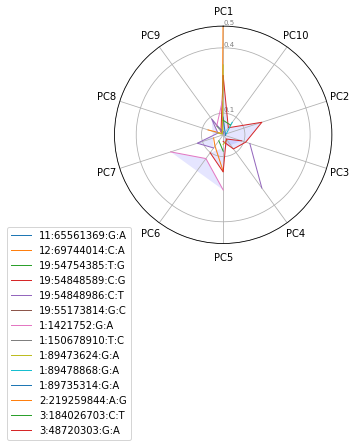

In [38]:
# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0.1,0.4,0.5], ["0.1","0.4","0.5"], color="grey", size=7)
plt.ylim(0,0.5)

for i,row in pca_icb.iterrows():
    values=pca_icb.loc[i].drop('ID').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=row["ID"])
    ax.fill(angles, values, 'b', alpha=0.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
